In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA

# Cargar los archivos CSV
mortalidad_diabetes = pd.read_csv('Mortalidad_diabetes.csv')
poblacion = pd.read_csv('Poblacion.csv')


# Objetivo 1


C:\Users\i_die\AppData\Local\Temp\ipykernel_2964\4076049543.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultos_mayores[column] = adultos_mayores[column].str.replace(',', '').astype(float)


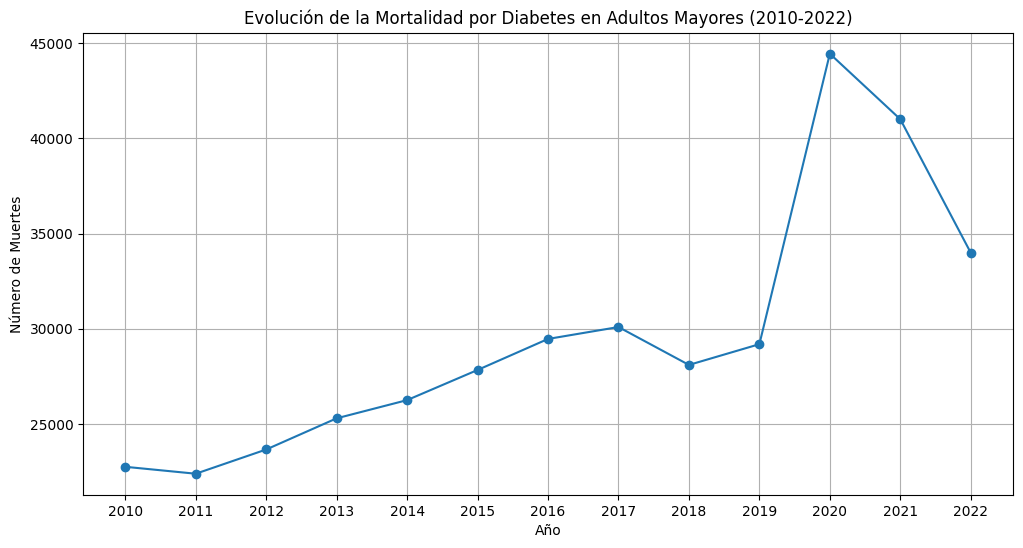

2010    22763.0
2011    22400.0
2012    23671.0
2013    25307.0
2014    26262.0
2015    27843.0
2016    29471.0
2017    30096.0
2018    28108.0
2019    29196.0
2020    44434.0
2021    40997.0
2022    33991.0
dtype: float64


In [16]:
# Convertir los datos a formato adecuado para series temporales
columns_to_keep = ['Edad'] + [str(year) for year in range(2010, 2023)]
mortalidad_diabetes_filtered = mortalidad_diabetes[columns_to_keep]

# Filtrar datos de adultos mayores (>=65 años)
adultos_mayores = mortalidad_diabetes_filtered.loc[
    mortalidad_diabetes_filtered['Edad'].isin(['65 a 69 años', '70 a 74 años', '75 a 79 años', '80 a 84 años', '85 años y más'])
]

# Eliminar comas y convertir a tipo float, excluyendo la primera columna ('Edad')
for column in adultos_mayores.columns[1:]:
    adultos_mayores[column] = adultos_mayores[column].str.replace(',', '').astype(float)

# Convertir a formato de serie temporal
mortalidad_series = adultos_mayores.set_index('Edad').transpose().sum(axis=1)

# Graficar la evolución de la mortalidad por diabetes en adultos mayores
plt.figure(figsize=(12, 6))
plt.plot(mortalidad_series, marker='o')
plt.title('Evolución de la Mortalidad por Diabetes en Adultos Mayores (2010-2022)')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.grid(True)
plt.show()

# Mostrar los datos en formato de serie temporal
print(mortalidad_series)

# Objetivo 2

C:\Users\i_die\AppData\Local\Temp\ipykernel_2964\1982569502.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  adultos_mayores_mortalidad[column] = adultos_mayores_mortalidad[column].str.replace(',', '').astype(float)
C:\Users\i_die\AppData\Local\Temp\ipykernel_2964\1982569502.py:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  poblacion_filtered_clean[column] = poblacion_filtered_clean[column].str.replace(',', '').astype(float)


Datos para Regresión Lineal:
    Año  Mortalidad_diabetes  Proporcion_adultos_mayores
0  2010              19419.0                    0.059143
1  2020              37685.0                    0.077376
                             OLS Regression Results                            
Dep. Variable:     Mortalidad_diabetes   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                    nan
Method:                  Least Squares   F-statistic:                       nan
Date:                 Fri, 24 May 2024   Prob (F-statistic):                nan
Time:                         22:28:50   Log-Likelihood:                 29.232
No. Observations:                    2   AIC:                            -54.46
Df Residuals:                        0   BIC:                            -57.08
Df Model:                            1                                         
Covariance Type:             nonrobust                                         


c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\stats\stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 2 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: divide by zero encountered in divide
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1796: RuntimeWarning: invalid value encountered in scalar multiply
  return 1 - (np.divide(self.nobs - self.k_constant, self.df_resid)
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\regression\linear_model.py:1718: RuntimeWarning: divide by zero encountered in scalar divide
  return np.dot(wresid, wresid) / self.df_resid


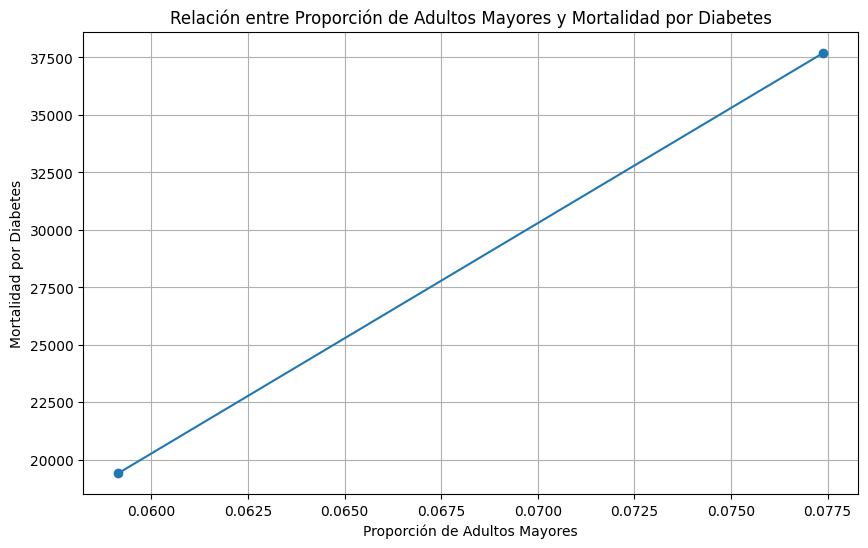

Correlación: 1.0


In [17]:
# Filtrar solo las columnas principales (sin ".1") en mortalidad_diabetes
columns_to_keep = ['Edad'] + [str(year) for year in range(2010, 2023)]
mortalidad_diabetes_filtered = mortalidad_diabetes[columns_to_keep]

# Filtrar datos de mortalidad de adultos mayores (>=65 años)
adultos_mayores_mortalidad = mortalidad_diabetes_filtered.loc[
    mortalidad_diabetes_filtered['Edad'].isin(['65 a 69 años', '70 a 74 años', '75 a 79 años', '80 a 84 años', '85 años y mas'])
]

# Eliminar comas y convertir a tipo float, excluyendo la primera columna ('Edad')
for column in adultos_mayores_mortalidad.columns[1:]:
    adultos_mayores_mortalidad[column] = adultos_mayores_mortalidad[column].str.replace(',', '').astype(float)

# Convertir a formato de serie temporal
mortalidad_series = adultos_mayores_mortalidad.set_index('Edad').transpose().sum(axis=1)
mortalidad_series.index = mortalidad_series.index.astype(int)

# Preparar datos de población

# Filtrar solo las columnas principales (sin ".1") en población
columns_to_keep = ['Edad', '2010', '2020']
poblacion_filtered = poblacion[columns_to_keep]

# Filtrar y eliminar filas no numéricas ('Hombres', 'Mujeres') antes de la conversión
poblacion_filtered_clean = poblacion_filtered[
    poblacion_filtered['Edad'].notna() & ~poblacion_filtered['Edad'].isin(['Hombres', 'Mujeres'])
]

# Convertir todos los valores a formato numérico eliminando comas y asegurando el tipo float
for column in poblacion_filtered_clean.columns[1:]:
    poblacion_filtered_clean[column] = poblacion_filtered_clean[column].str.replace(',', '').astype(float)

# Filtrar datos de población de adultos mayores (>=65 años)
adultos_mayores_poblacion = poblacion_filtered_clean.loc[
    poblacion_filtered_clean['Edad'].isin(['65 a 69 años', '70 a 74 años', '75 a 79 años', '80 a 84 años', '85 años y mas'])
]

# Sumar la población de adultos mayores para cada año
poblacion_adultos_mayores_series = adultos_mayores_poblacion.set_index('Edad').sum(axis=0)

# Sumar la población total para cada año
poblacion_total_series = poblacion_filtered_clean.set_index('Edad').sum(axis=0)

# Calcular la proporción de adultos mayores
proporcion_adultos_mayores = poblacion_adultos_mayores_series / poblacion_total_series
proporcion_adultos_mayores.index = proporcion_adultos_mayores.index.astype(int)

# Alinear los años de la serie de mortalidad y la proporción de adultos mayores
mortalidad_series_aligned = mortalidad_series.loc[[2010, 2020]]

# Crear un DataFrame unificado para la regresión
data_regresion = pd.DataFrame({
    'Año': mortalidad_series_aligned.index,
    'Mortalidad_diabetes': mortalidad_series_aligned.values,
    'Proporcion_adultos_mayores': proporcion_adultos_mayores.loc[[2010, 2020]].values
})

# Mostrar los datos para regresión
print("Datos para Regresión Lineal:")
print(data_regresion)

# Análisis de regresión

# Definir las variables independientes (con constante añadida)
X = data_regresion[['Año', 'Proporcion_adultos_mayores']]
X = sm.add_constant(X)

# Definir la variable dependiente
y = data_regresion['Mortalidad_diabetes']

# Crear y ajustar el modelo de regresión lineal múltiple
model = sm.OLS(y, X).fit()
print(model.summary())

# Gráfica de dispersión y correlación
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data_regresion['Proporcion_adultos_mayores'], y=data_regresion['Mortalidad_diabetes'])
plt.plot(data_regresion['Proporcion_adultos_mayores'], data_regresion['Mortalidad_diabetes'], linestyle='-', marker='o')
plt.title('Relación entre Proporción de Adultos Mayores y Mortalidad por Diabetes')
plt.xlabel('Proporción de Adultos Mayores')
plt.ylabel('Mortalidad por Diabetes')
plt.grid(True)
plt.show()

# Calcular la correlación
correlacion = data_regresion['Proporcion_adultos_mayores'].corr(data_regresion['Mortalidad_diabetes'])
print(f"Correlación: {correlacion}")

# Objetivo 3

c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


Datos de entrenamiento:
2010    19419.0
2011    19092.0
2012    20210.0
2013    21444.0
2014    22313.0
2015    23546.0
2016    24881.0
2017    25329.0
2018    23661.0
2019    24566.0
2020    37685.0
dtype: float64
Datos de prueba:
2021    34463.0
2022    28067.0
dtype: float64


c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   11
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -97.109
Date:                Fri, 24 May 2024   AIC                            200.218
Time:                        22:28:50   BIC                            201.126
Sample:                             0   HQIC                           199.222
                                 - 11                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.0000      0.005    184.903      0.000       0.989       1.011
ma.L1         -0.9994      0.733     -1.363      0.173      -2.437       0.438
sigma2      1.509e+07   4.84e-08   3.12e+14      0.0

c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\i_die\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


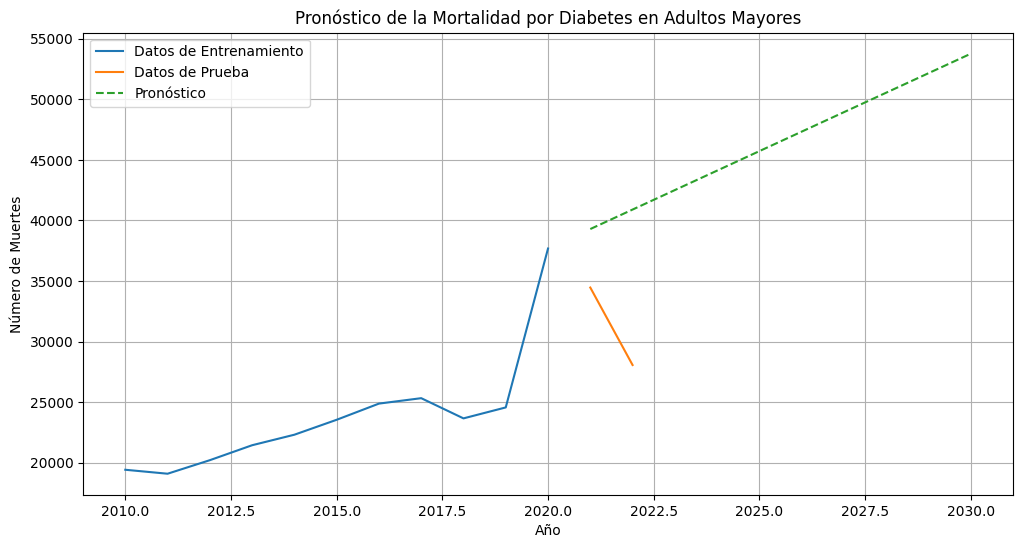

Pronóstico Extendido de la Mortalidad por Diabetes:
2021   NaN
2022   NaN
2023   NaN
2024   NaN
2025   NaN
2026   NaN
2027   NaN
2028   NaN
2029   NaN
2030   NaN
Name: predicted_mean, dtype: float64


In [18]:
# Verificar datos
print("Datos de entrenamiento:")
print(train_data)
print("Datos de prueba:")
print(test_data)

# Ajustar el modelo ARIMA
model = ARIMA(train_data, order=(1, 1, 1))
model_fit = model.fit()

# Verificar ajuste del modelo
print(model_fit.summary())

# Realizar predicciones para los próximos 10 años adicionales (2021-2030)
forecast_extended = model_fit.get_forecast(steps=10)
forecast_mean = forecast_extended.predicted_mean

# Crear un índice para los años pronosticados
forecast_index = range(2021, 2031)

# Verificar predicciones
print("Predicciones:")
print(forecast_mean)

# Paso 6: Visualizar los resultados incluyendo los próximos 10 años adicionales
plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Datos de Entrenamiento')
plt.plot(test_data, label='Datos de Prueba')
plt.plot(forecast_index, forecast_mean, label='Pronóstico', linestyle='--')
plt.title('Pronóstico de la Mortalidad por Diabetes en Adultos Mayores')
plt.xlabel('Año')
plt.ylabel('Número de Muertes')
plt.legend()
plt.grid(True)
plt.show()

# Mostrar el pronóstico extendido
forecast_extended_series = pd.Series(forecast_mean, index=forecast_index)
print("Pronóstico Extendido de la Mortalidad por Diabetes:")
print(forecast_extended_series)